In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from pandas_profiling import ProfileReport
pd.options.display.max_columns = None

In [4]:
# read cleaned Boston data
dataset = ['Boston_marathon_result_2015_cl.xlsx', 'Boston_marathon_result_2016_cl.xlsx', 'Boston_marathon_result_2017_cl.xlsx']
dfs = []
for i in range(0, len(dataset)):
    df = pd.read_excel(dataset[i], index_col=None, header=0)
    df['Year'] = int(''.join(filter(str.isdigit, dataset[i])))
    dfs.append(df)
dataframe = pd.concat(dfs, axis=0, sort=False, ignore_index=True)
dataframe = dataframe.rename(columns={'Gender': 'GRank', 'M/F': 'Gender'})
del dataframe['Unnamed: 2']

In [5]:
# # Summarize dataset
# dataframe.head()
# dataframe.describe()
# # create profile
# profile = ProfileReport(dataframe)
# # save the report
# profile.to_file('boston_profile.html')

In [6]:
# convert string timeseries into floats (minutes)
dataframe['5K'] = pd.to_timedelta(pd.Series(dataframe['5K'].astype(str))) / pd.offsets.Minute(1)
dataframe['10K'] = pd.to_timedelta(pd.Series(dataframe['10K'].astype(str))) / pd.offsets.Minute(1)
dataframe['15K'] = pd.to_timedelta(pd.Series(dataframe['15K'].astype(str))) / pd.offsets.Minute(1)
dataframe['20K'] = pd.to_timedelta(pd.Series(dataframe['20K'].astype(str))) / pd.offsets.Minute(1)
dataframe['Half'] = pd.to_timedelta(pd.Series(dataframe['Half'].astype(str))) / pd.offsets.Minute(1)
dataframe['25K'] = pd.to_timedelta(pd.Series(dataframe['25K'].astype(str))) / pd.offsets.Minute(1)
dataframe['30K'] = pd.to_timedelta(pd.Series(dataframe['30K'].astype(str))) / pd.offsets.Minute(1)
dataframe['35K'] = pd.to_timedelta(pd.Series(dataframe['35K'].astype(str))) / pd.offsets.Minute(1)
dataframe['40K'] = pd.to_timedelta(pd.Series(dataframe['40K'].astype(str))) / pd.offsets.Minute(1)
dataframe['Pace'] = pd.to_timedelta(pd.Series(dataframe['Pace'].astype(str))) / pd.offsets.Minute(1)
dataframe['Official Time'] = pd.to_timedelta(pd.Series(dataframe['Official Time'].astype(str))) / pd.offsets.Minute(1)

In [7]:
# statistical (t-test) function
def statcheck(dataframe1, dataframe2):
    t, p = stats.ttest_ind(dataframe1,dataframe2)
    alpha = 0.05
    if p <= alpha:
        print('Variables are dependent (reject H0)')
    else:
        print('Variables are independent (fail to reject H0)')

In [8]:
# estimate function
def estimate(title, dataframe):
    print("{}: mean = {:6.4f}; median = {:6.4f}, std = {:6.4f}".format(title, dataframe.mean(), dataframe.median(), dataframe.std(ddof=1)))

In [9]:
# plotting function
def visualize(dataframe1, dataframe2, title, label1, label2, xlabel, ylabel, color1, color2, box):
    fig, ax = plt.subplots(figsize=(15, 5))
    blue_square = dict(markerfacecolor=color1, marker='s')
    green_diamond = dict(markerfacecolor=color2, marker='D')
    bp1 = ax.boxplot(dataframe1, positions=[2], vert=False, flierprops=blue_square, widths=0.35, patch_artist=True, boxprops=dict(facecolor=color1))
    bp2 = ax.boxplot(dataframe2, positions=[1], vert=False, flierprops=green_diamond, widths=0.35, patch_artist=True, boxprops=dict(facecolor=color2))
    # Set axis labels
    ax.set_xlabel(xlabel, labelpad=30, weight='bold', size=12)
    ax.set_ylabel(ylabel, labelpad=50, weight='bold', size=12)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tick_params(axis='x', rotation=0, labelsize=12)
    plt.tick_params(axis='y', rotation=0, labelsize=12)
    plt.axis(box)
    ax.legend([bp1["boxes"][0], bp2["boxes"][0]], [label1, label2], loc='upper right', prop={'size': 16})
    plt.suptitle(title, fontsize=16)
    plt.show()

Year 2015: 
Variables are independent (fail to reject H0)
Half difference males: mean = 10.7469; median = 7.1833, std = 13.5459
Half difference females: mean = 10.6640; median = 7.9833, std = 14.1213


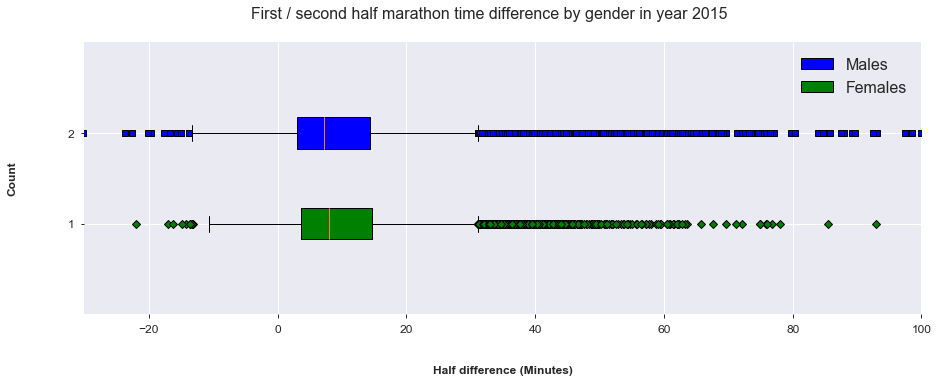

Year 2016: 
Variables are dependent (reject H0)
Half difference males: mean = 17.7939; median = 14.4667, std = 15.3739
Half difference females: mean = 14.2902; median = 11.7500, std = 12.6316


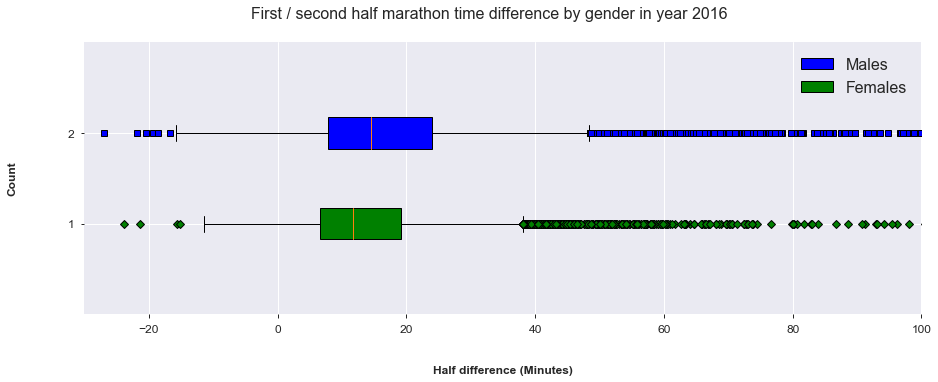

Year 2017: 
Variables are dependent (reject H0)
Half difference males: mean = 18.6202; median = 15.1833, std = 16.5045
Half difference females: mean = 15.4824; median = 13.0500, std = 13.5999


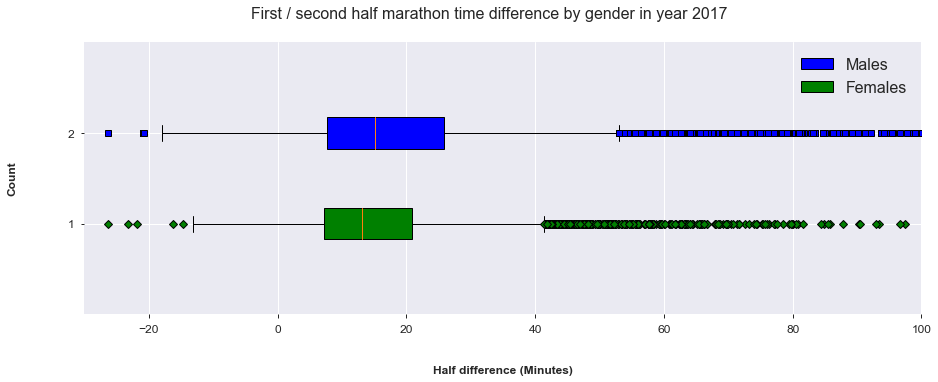

In [10]:
# Assumption 1a: female runners have a better 2nd half than male runners
dataframe['Half2'] = dataframe['Official Time'] - dataframe['Half']
# In our further assumptions we are interested in those who manage to reach the finish
dataframe = dataframe[dataframe.Half2 > 0]
dataframe['Halfdiff'] = dataframe['Half2'] - dataframe['Half']
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    halfdiff_male = dataframe['Halfdiff'][dataframe.Year == year][dataframe.Gender == 'M']
    halfdiff_female = dataframe['Halfdiff'][dataframe.Year == year][dataframe.Gender == 'F']
    statcheck(halfdiff_male, halfdiff_female)
    # estimate means
    estimate('Half difference males', halfdiff_male)
    estimate('Half difference females', halfdiff_female)
    # plot histograms
    visualize(halfdiff_male, halfdiff_female, "First / second half marathon time difference by gender in year {0:d}".format(year), 'Males', 'Females', 'Half difference (Minutes)', 'Count', 'b', 'g', [-30, 100, 0, 3])

Year 2015: 
Variables are dependent (reject H0)
First-last 10K difference males: mean = 19.0577; median = 15.9667, std = 12.3014
First-last 10K difference females: mean = 19.6848; median = 17.3667, std = 11.4519


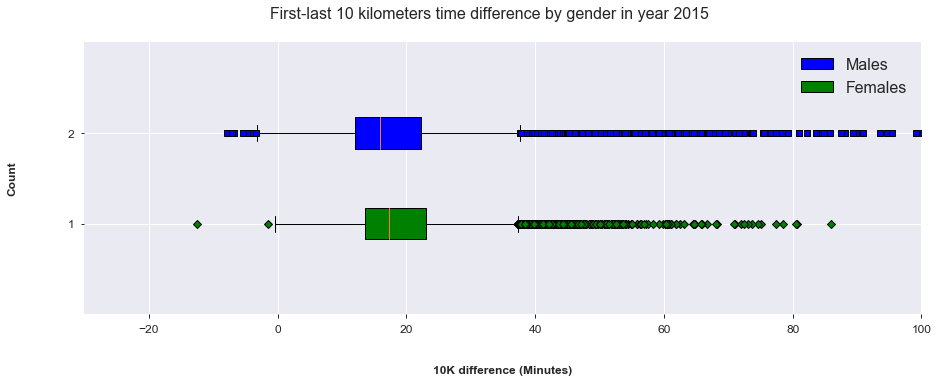

Year 2016: 
Variables are dependent (reject H0)
First-last 10K difference males: mean = 24.5447; median = 21.9833, std = 12.3686
First-last 10K difference females: mean = 22.8477; median = 20.7000, std = 11.2849


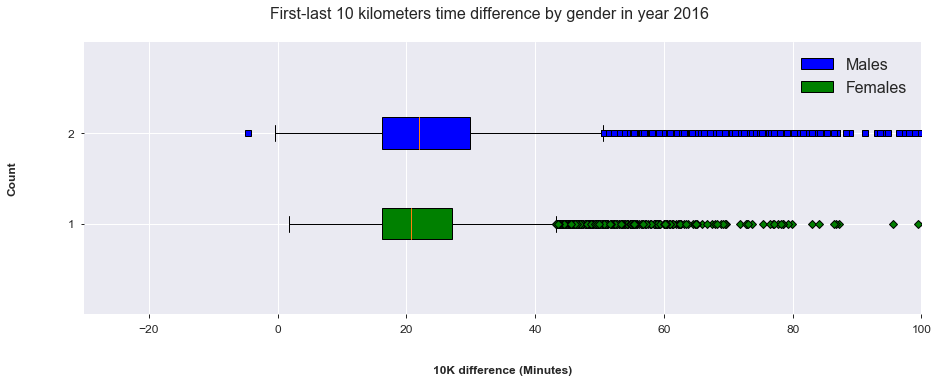

Year 2017: 
Variables are dependent (reject H0)
First-last 10K difference males: mean = 25.4055; median = 22.7833, std = 13.7254
First-last 10K difference females: mean = 23.5990; median = 21.5333, std = 11.8453


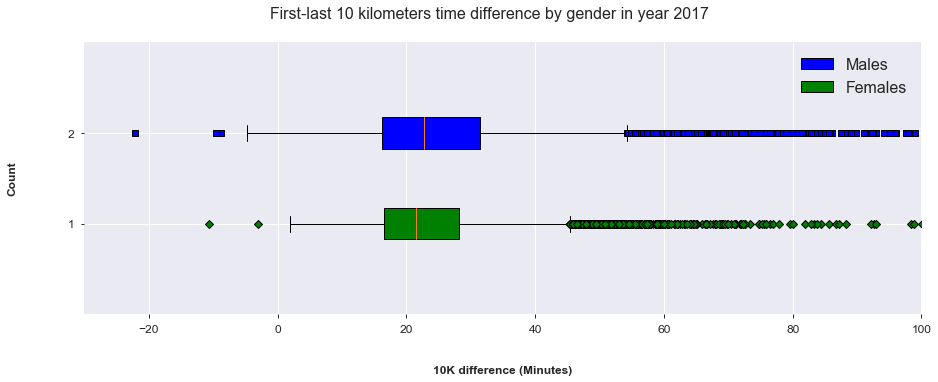

In [11]:
# Assumption 1b: female runners have a better last 10k than male runners
dataframe['last10K'] = dataframe['Official Time'] - dataframe['30K']
dataframe['10Kdiff'] = dataframe['last10K'] - dataframe['10K']
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    fl10Kdiff_male = dataframe['10Kdiff'][dataframe.Year == year][dataframe.Gender == 'M']
    fl10Kdiff_female = dataframe['10Kdiff'][dataframe.Year == year][dataframe.Gender == 'F']
    statcheck(fl10Kdiff_male, fl10Kdiff_female)
    # estimate means
    estimate('First-last 10K difference males', fl10Kdiff_male)
    estimate('First-last 10K difference females', fl10Kdiff_female)
    # plot histograms
    visualize(fl10Kdiff_male, fl10Kdiff_female, "First-last 10 kilometers time difference by gender in year {0:d}".format(year), 'Males', 'Females', '10K difference (Minutes)', 'Count', 'b', 'g', [-30, 100, 0, 3])

Year 2015: 
Variables are dependent (reject H0)
Half-ratio males: mean = 0.9166; median = 0.9320, std = 0.0794
Half-ratio females: mean = 0.9225; median = 0.9325, std = 0.0731


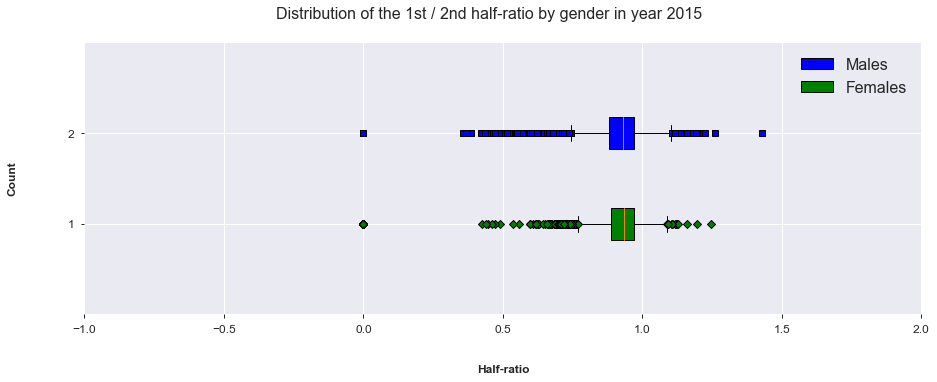

Year 2016: 
Variables are dependent (reject H0)
Half-ratio males: mean = 0.8651; median = 0.8761, std = 0.0874
Half-ratio females: mean = 0.8977; median = 0.9063, std = 0.0698


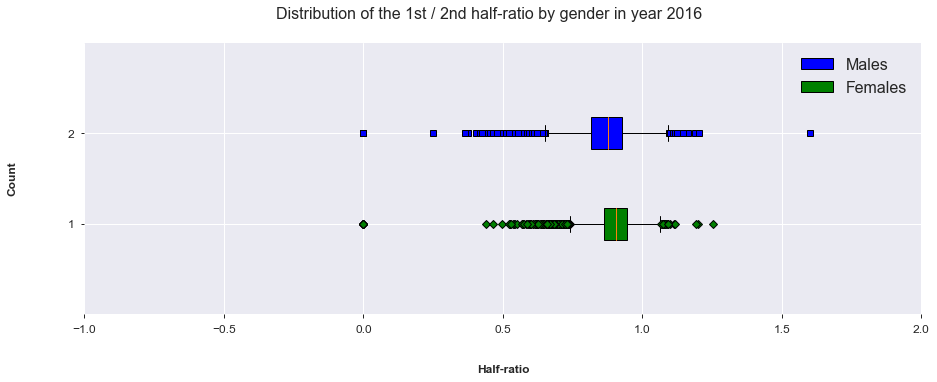

Year 2017: 
Variables are dependent (reject H0)
Half-ratio males: mean = 0.8626; median = 0.8731, std = 0.0934
Half-ratio females: mean = 0.8908; median = 0.8987, std = 0.0742


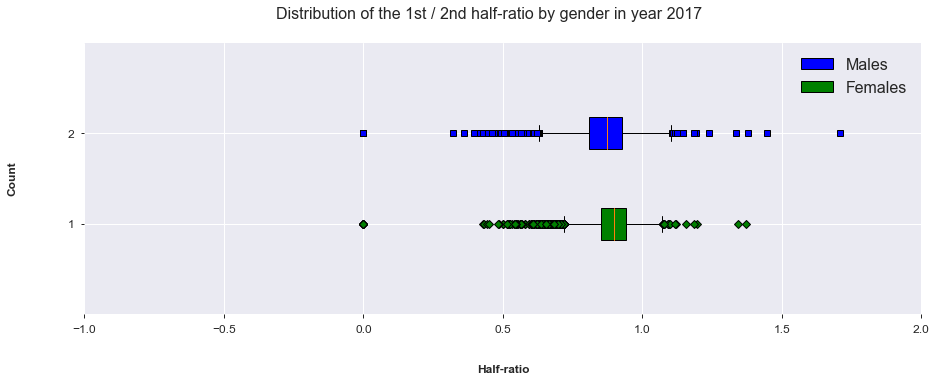

In [12]:
# Assumption 2: male runners have a faster 1st half than female runners
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    dataframe['Halfratio'] = dataframe['Half'] / dataframe['Half2']
    halfratio_male = dataframe['Halfratio'][dataframe.Year == year][dataframe.Gender == 'M']
    halfratio_female = dataframe['Halfratio'][dataframe.Year == year][dataframe.Gender == 'F']
    statcheck(halfratio_male,halfratio_female)
    # estimate means
    estimate('Half-ratio males', halfratio_male)
    estimate('Half-ratio females', halfratio_female)
    # plot histograms
    visualize(halfratio_male, halfratio_female, "Distribution of the 1st / 2nd half-ratio by gender in year {0:d}".format(year), 'Males', 'Females', 'Half-ratio', 'Count', 'b', 'g', [-1, 2, 0, 3])

Year 2015: 
Variables are independent (fail to reject H0)
Pace Locals: mean = 8.5963; median = 8.2833, std = 1.5993
Pace non-Locals: mean = 8.6501; median = 8.4000, std = 1.5387
Numbers: locals = 2696; non-locals = 23902


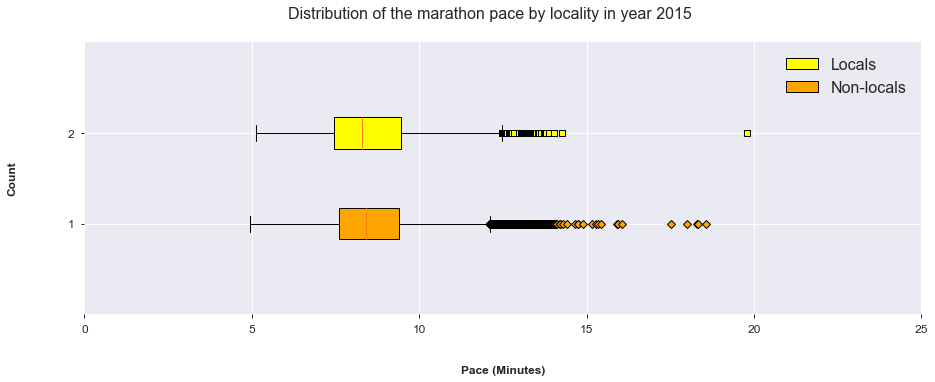

Year 2016: 
Variables are independent (fail to reject H0)
Pace Locals: mean = 8.9482; median = 8.6000, std = 1.6667
Pace non-Locals: mean = 8.9757; median = 8.7167, std = 1.5567
Numbers: locals = 2665; non-locals = 23965


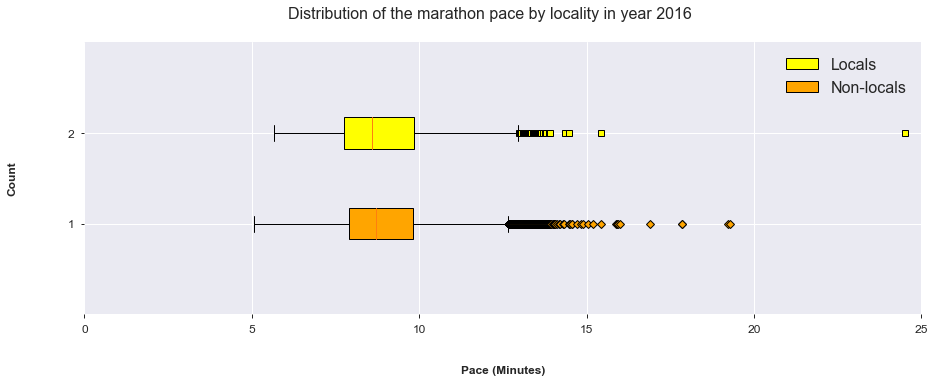

Year 2017: 
Variables are independent (fail to reject H0)
Pace Locals: mean = 9.0472; median = 8.7500, std = 1.6828
Pace non-Locals: mean = 9.0926; median = 8.8500, std = 1.5987
Numbers: locals = 2711; non-locals = 23699


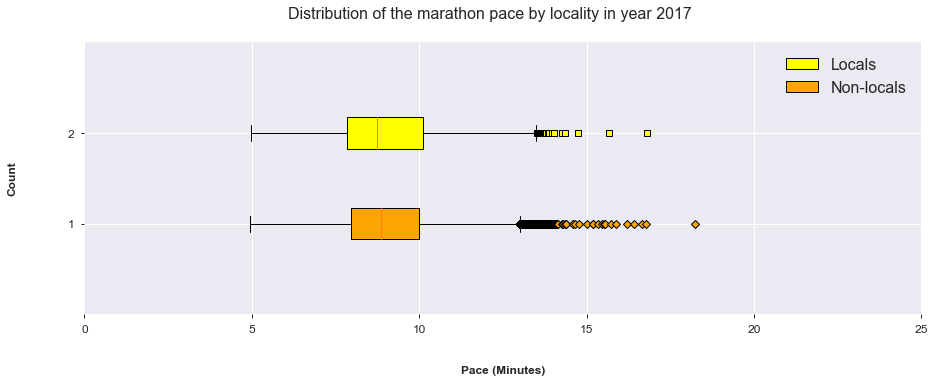

In [13]:
# Assumption 5: local runners (from Boston or close) have a more stable run than non locals
#Neighbours = ["Boston", "Winthrop", "Revere", "Chelsea", "Everett", "Somerville", "Cambridge", "Watertown", "Newton", "Brookline", "Needham", "Dedham", "Canton", "Milton", "Quincy"] # close cities
Neighbours = ['Boston', 'New York', 'Chicago', 'Cambridge', 'Toronto', 'San Francisco', 'Portland', 'Houston', 'Austin', 'Washington'] # top 10 in number of participants
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    local = dataframe['Pace'][dataframe.Year == year][dataframe.City.isin(Neighbours)]
    nolocal = dataframe['Pace'][dataframe.Year == year][~dataframe.City.isin(Neighbours)]
    statcheck(local, nolocal)
    # estimate means
    estimate('Pace Locals', local)
    estimate('Pace non-Locals', nolocal)
    print("Numbers: locals = {}; non-locals = {}".format(len(local), len(nolocal)))
    # plot histograms
    visualize(local, nolocal, "Distribution of the marathon pace by locality in year {0:d}".format(year), 'Locals', 'Non-locals', 'Pace (Minutes)', 'Count', 'yellow', 'orange', [0, 25, 0, 3])

Year 2015: 
Variables are dependent (reject H0)
Pace Return: mean = 8.6133; median = 8.3500, std = 1.5360
Pace Non-Return: mean = 8.7481; median = 8.4833, std = 1.5703
Numbers: return = 2711; non-return = 23699


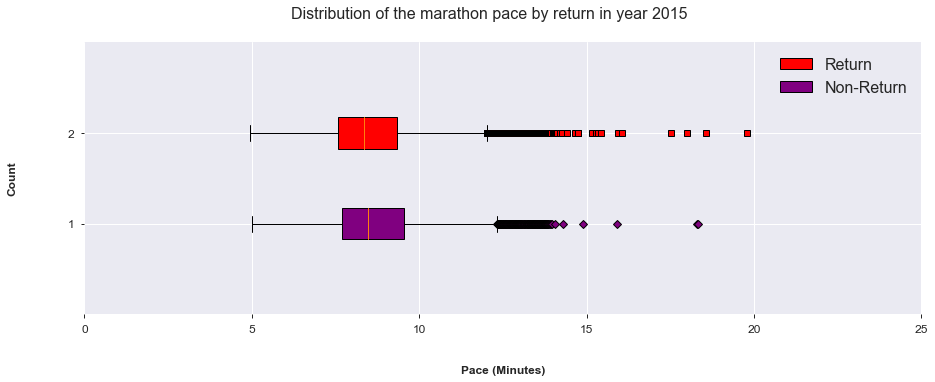

Year 2016: 
Variables are dependent (reject H0)
Pace Return: mean = 8.9331; median = 8.6667, std = 1.5544
Pace Non-Return: mean = 9.1155; median = 8.8833, std = 1.6082
Numbers: return = 2711; non-return = 23699


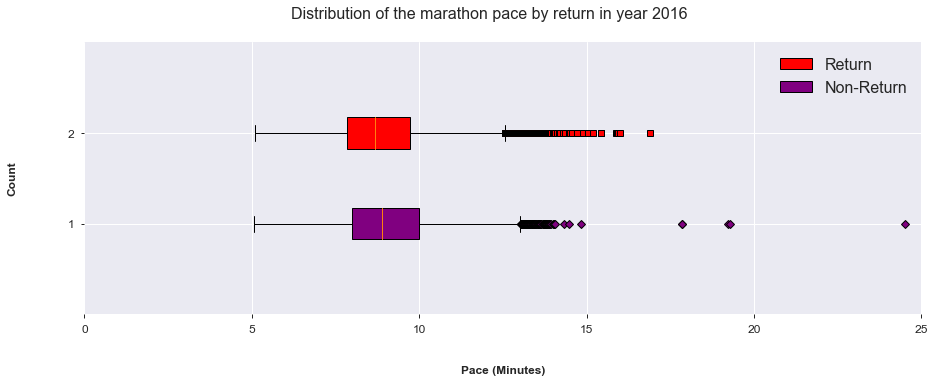

Year 2017: 
Variables are dependent (reject H0)
Pace Return: mean = 9.0765; median = 8.8333, std = 1.6076
Pace Non-Return: mean = 9.1223; median = 8.8833, std = 1.6072
Numbers: return = 2711; non-return = 23699


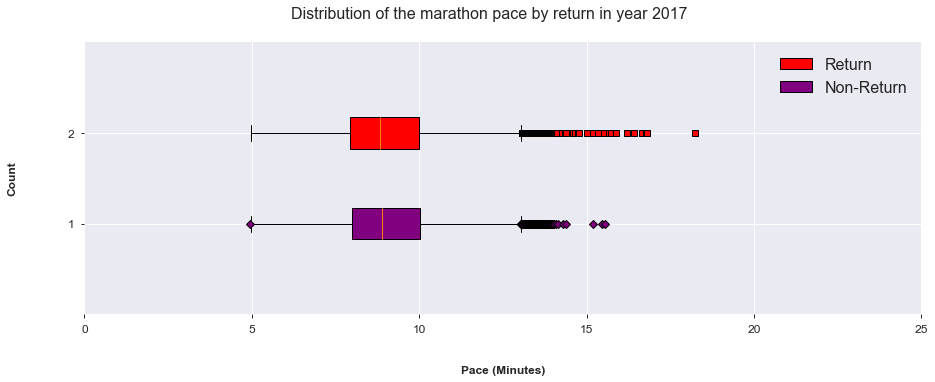

In [14]:
# Assumption 6: runners who return do better (more stable and maybe faster, lower suffer score)
Returns = dataframe[dataframe.Name.duplicated()]['Name'].tolist()
for year in dataframe.Year.unique():
    print('Year {0:d}: '.format(year))
    ret = dataframe['Pace'][dataframe.Year == year][dataframe.Name.isin(Returns)]
    nonret = dataframe['Pace'][dataframe.Year == year][~dataframe.Name.isin(Returns)]
    statcheck(ret, nonret)
    # estimate means
    estimate('Pace Return', ret)
    estimate('Pace Non-Return', nonret)
    print("Numbers: return = {}; non-return = {}".format(len(local), len(nolocal)))
    # plot histograms
    visualize(ret, nonret, "Distribution of the marathon pace by return in year {0:d}".format(year), 'Return', 'Non-Return', 'Pace (Minutes)', 'Count', 'red', 'purple', [0, 25, 0, 3])

Year 2015: 


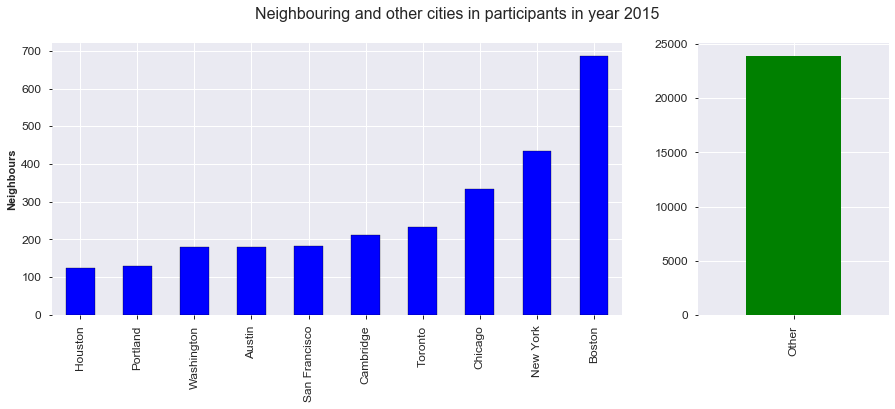

Year 2016: 


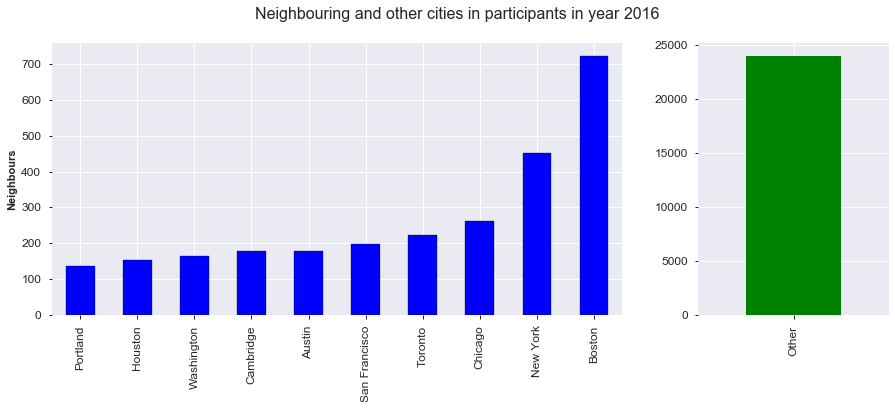

Year 2017: 


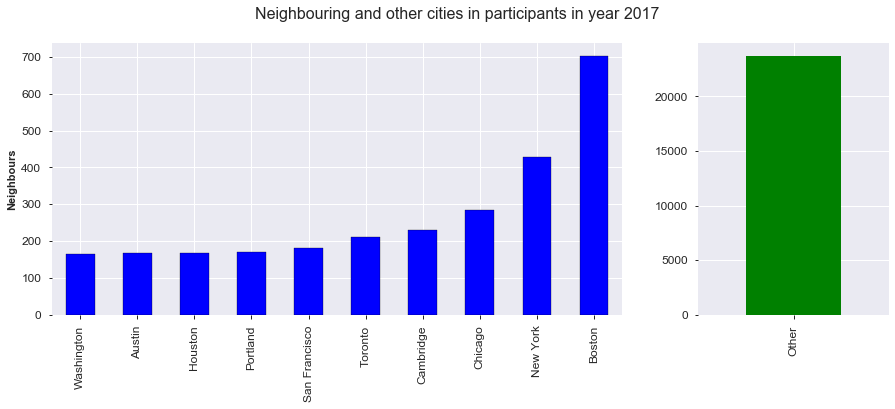

In [38]:
# participants based on neighbour and other cities
dataframe['Neighbour'] = np.where(dataframe.City.isin(Neighbours), dataframe.City, 'Other')
for year in dataframe.Year.unique():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 1]})
    print('Year {0:d}: '.format(year))
    dataframe[(dataframe.Year == year) & (~dataframe.Neighbour.isin(['Other']))]['Neighbour'].value_counts(ascending=True).plot(kind='bar', facecolor='blue', edgecolor='black', fontsize=12, ax = axes[0])
    dataframe[(dataframe.Year == year) & (dataframe.Neighbour.isin(['Other']))]['Neighbour'].value_counts().plot(kind='bar', color='green', fontsize=12, ax = axes[1])
    axes[0].set_ylabel('Neighbours', weight='bold')
    plt.suptitle('Neighbouring and other cities in participants in year {0:d}'.format(year), fontsize=16)
    plt.show()

Year 2015: 


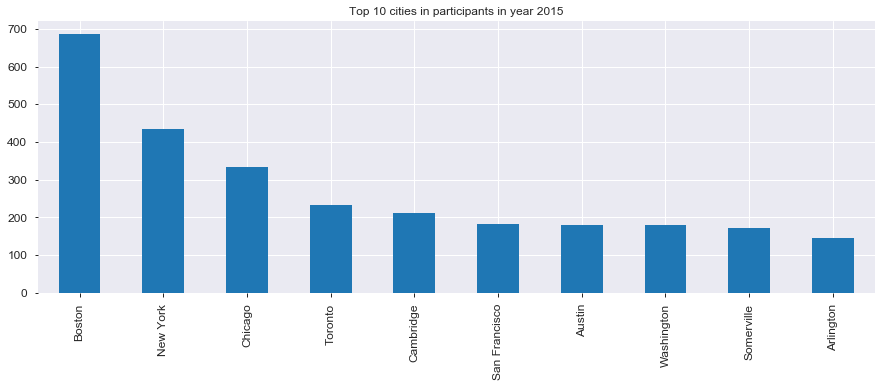

Year 2016: 


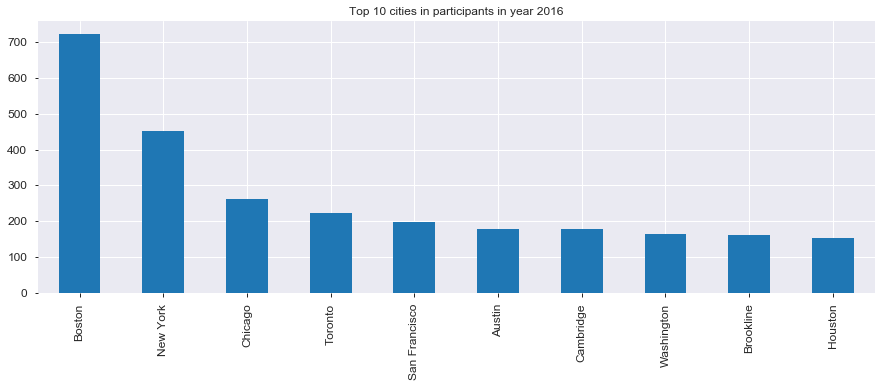

Year 2017: 


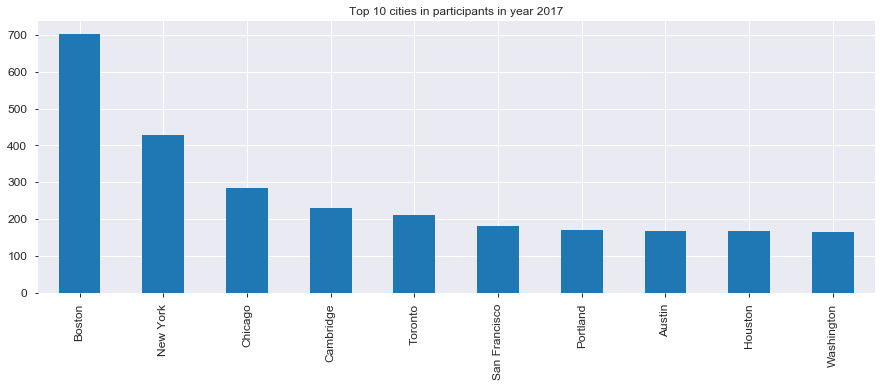

In [16]:
# cities with the largest number of participants
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    ax = dataframe[dataframe.Year == year]['City'].value_counts()[:10].plot(kind='bar', title='Top 10 cities in participants in year {0:d}'.format(year), figsize=(15,5), fontsize=12)
    plt.show()

In [17]:
# define pace per interval
dataframe['5K_pace'] = dataframe['5K'] / 5
dataframe['10K_pace'] = dataframe['10K'] / 10
dataframe['15K_pace'] = dataframe['15K'] / 15
dataframe['20K_pace'] = dataframe['20K'] / 20
dataframe['half_pace'] = dataframe['Half'] / 21.0975
dataframe['25K_pace'] = dataframe['25K'] / 25
dataframe['30K_pace'] = dataframe['30K'] / 30
dataframe['35K_pace'] = dataframe['35K'] / 35
dataframe['40K_pace'] = dataframe['40K'] / 40
dataframe['full_pace'] = dataframe['Official Time'] / 42.195

Year 2015: 


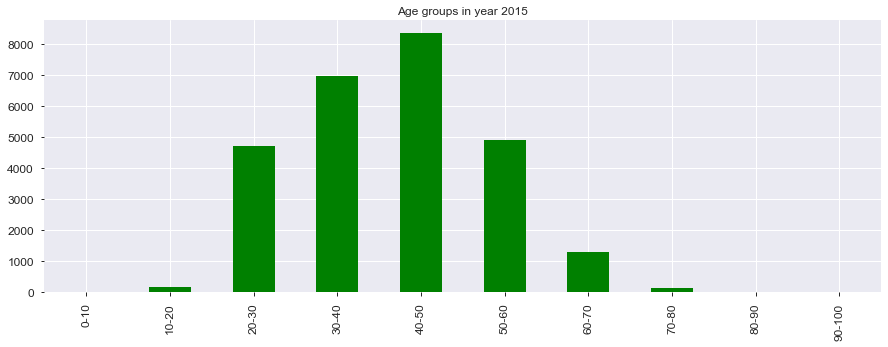

Year 2016: 


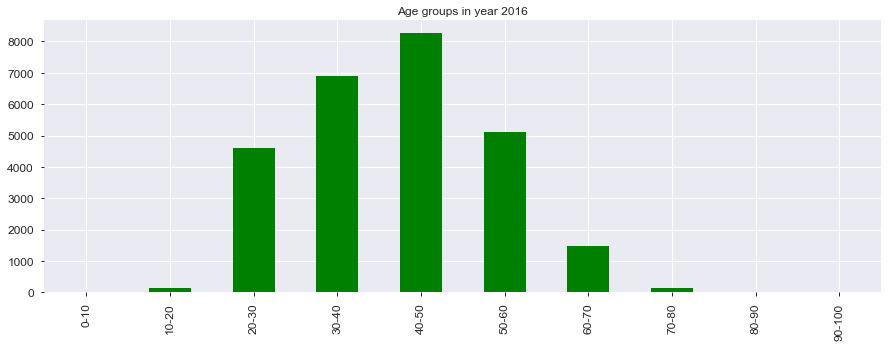

Year 2017: 


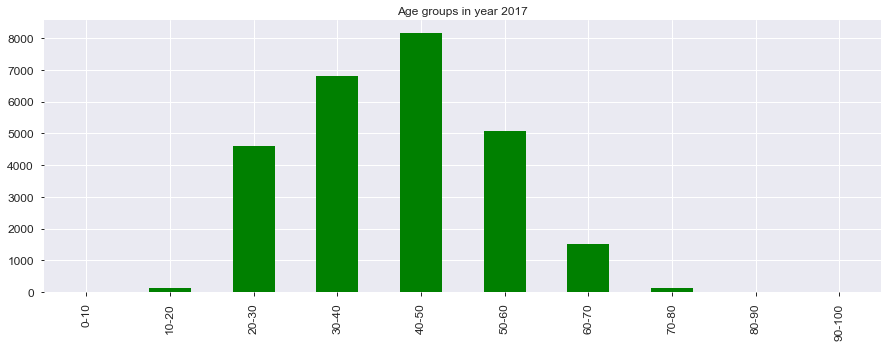

In [18]:
# binning the age of the participants
dataframe['age_bin'] = pd.cut(dataframe['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    dataframe[dataframe.Year == year]['age_bin'].value_counts().reindex(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']).plot(kind='bar', title='Age groups in year {0:d}'.format(year), sort_columns=False, color='green', figsize=(15,5), fontsize=12)
    plt.show()

Year 2015: 


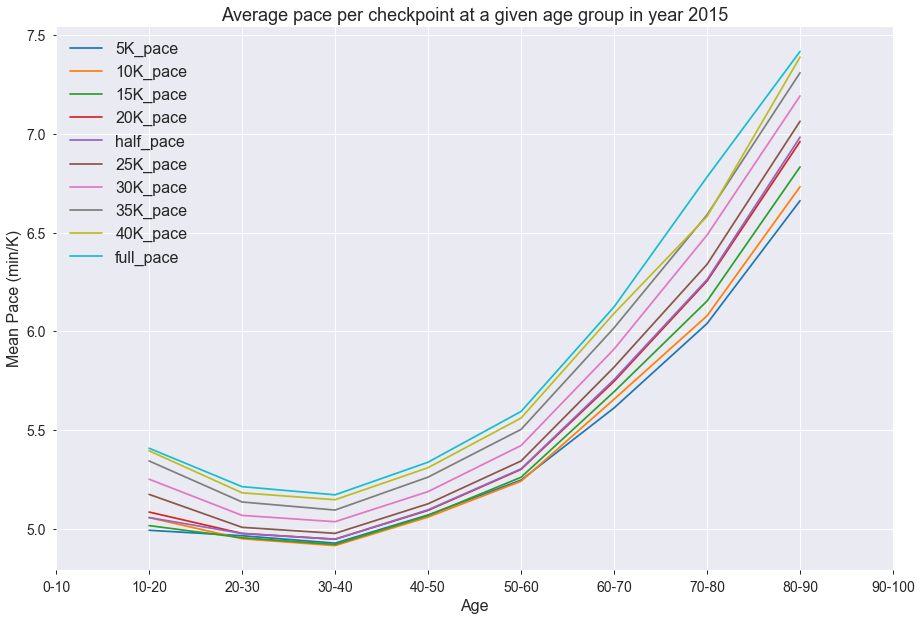

Year 2016: 


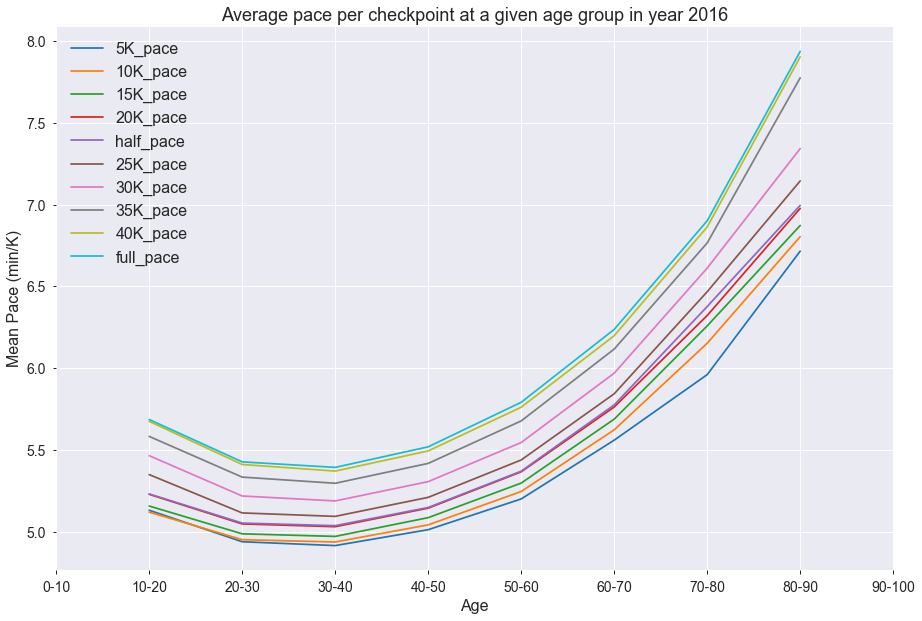

Year 2017: 


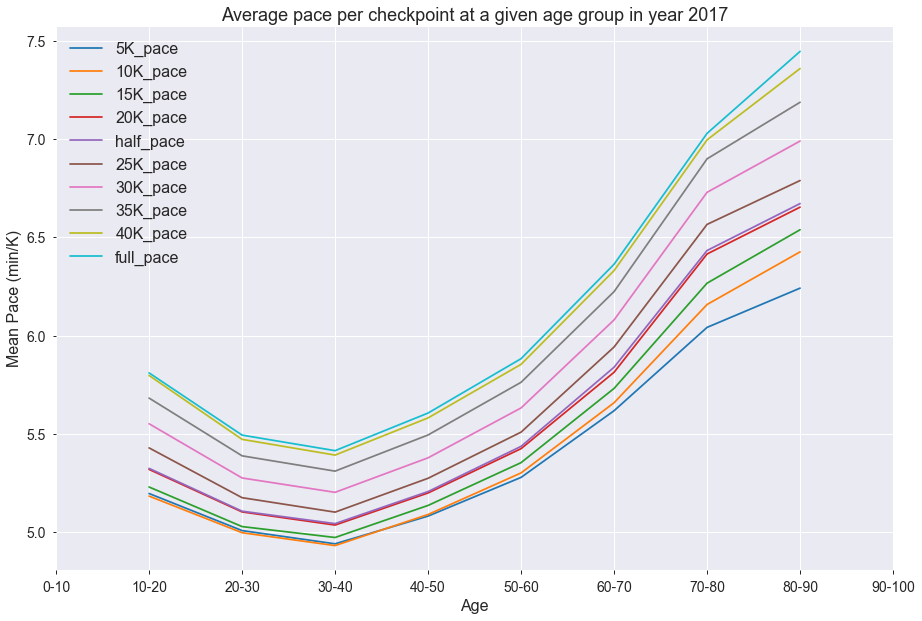

In [19]:
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    for pace in ['5K_pace', '10K_pace', '15K_pace', '20K_pace', 'half_pace', '25K_pace', '30K_pace', '35K_pace', '40K_pace', 'full_pace']:
        ax = dataframe[dataframe.Year == year].groupby('age_bin')[pace].mean().plot(kind='line', figsize=(15,10), fontsize=14)
    ax.set_xlabel("Age", fontsize=16)
    ax.set_ylabel("Mean Pace (min/K)", fontsize=16)
    ax.set_title("Average pace per checkpoint at a given age group in year {0:d}".format(year), fontsize=18)
    ax.legend(prop={'size': 16})
    plt.show()

Year 2015: 


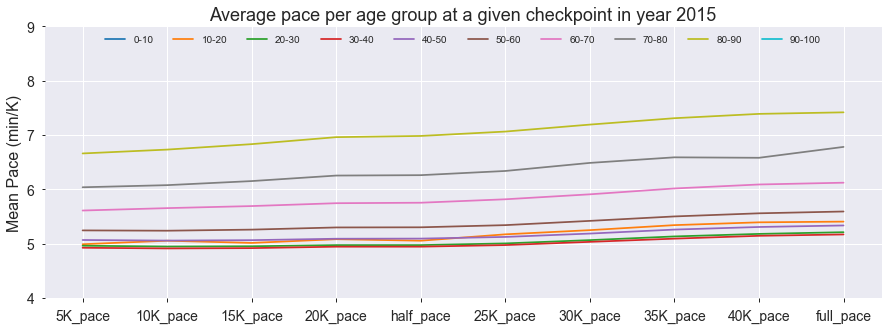

Year 2016: 


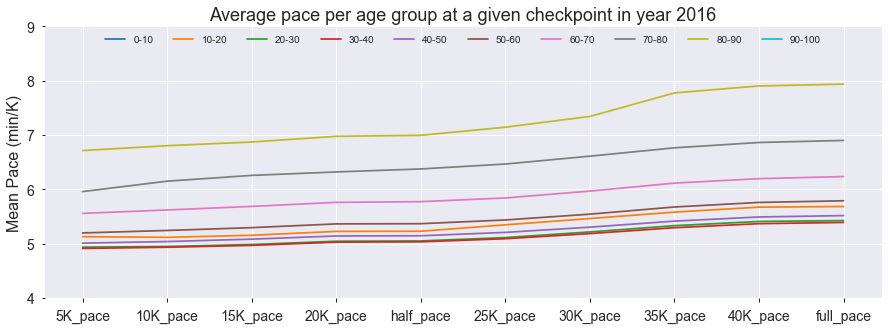

Year 2017: 


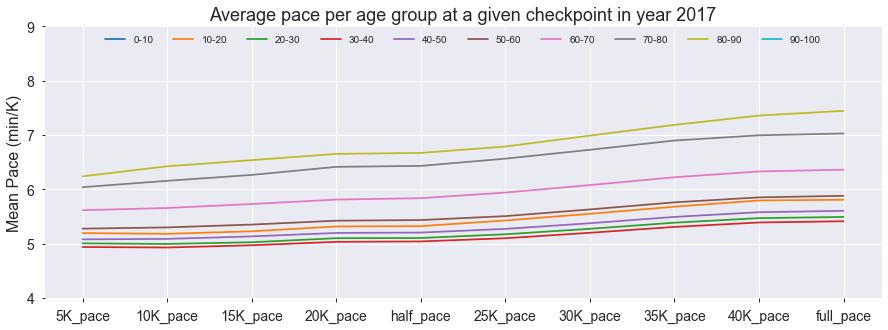

In [20]:
Paces = ['5K_pace', '10K_pace', '15K_pace', '20K_pace', 'half_pace', '25K_pace', '30K_pace', '35K_pace', '40K_pace', 'full_pace']
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    for ages in ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']:
        pace_means = []
        for pace in Paces:
            pace_means.append(dataframe[(dataframe.Year == year) & (dataframe.age_bin == ages)][pace].mean())  
        ax.plot(Paces, pace_means, label = ages)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    ax.set_ylabel("Mean Pace (min/K)", fontsize=16)
    ax.set_title("Average pace per age group at a given checkpoint in year {0:d}".format(year), fontsize=18)
    ax.legend(loc=9, ncol=10, prop={'size': 10})
    ax.set_ylim(4, 9)
    plt.show()

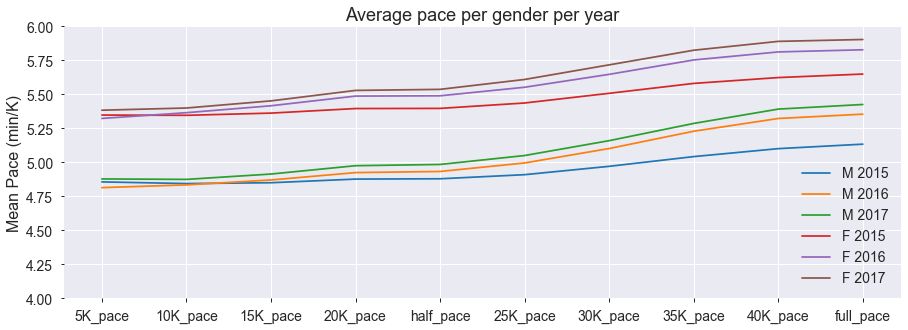

In [21]:
Paces = ['5K_pace', '10K_pace', '15K_pace', '20K_pace', 'half_pace', '25K_pace', '30K_pace', '35K_pace', '40K_pace', 'full_pace']
fig, ax = plt.subplots(figsize=(15, 5))
for gender in dataframe.Gender.unique():
    for year in dataframe.Year.unique():
        pace_means = []
        for pace in Paces:
            pace_means.append(dataframe[(dataframe.Year == year) & (dataframe.Gender == gender)][pace].mean())  
        ax.plot(Paces, pace_means, label = "{} {}".format(gender, year))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax.set_ylabel("Mean Pace (min/K)", fontsize=16)
ax.set_title("Average pace per gender per year", fontsize=18)
ax.legend(prop={'size': 14})
ax.set_ylim(4, 6)
plt.show()

Year 2015: 


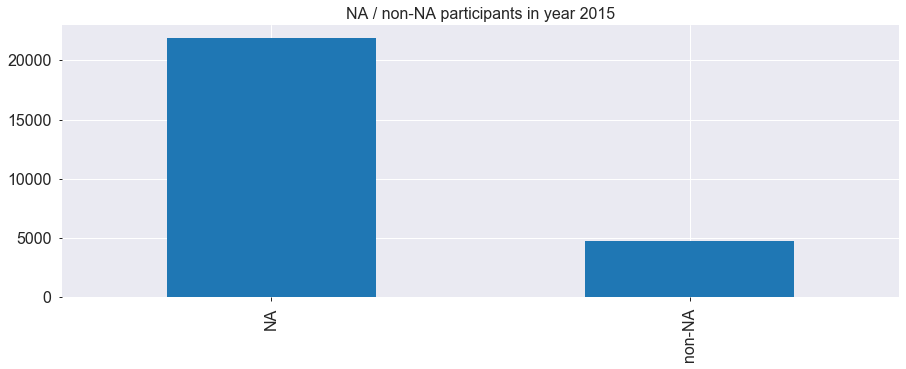

Year 2016: 


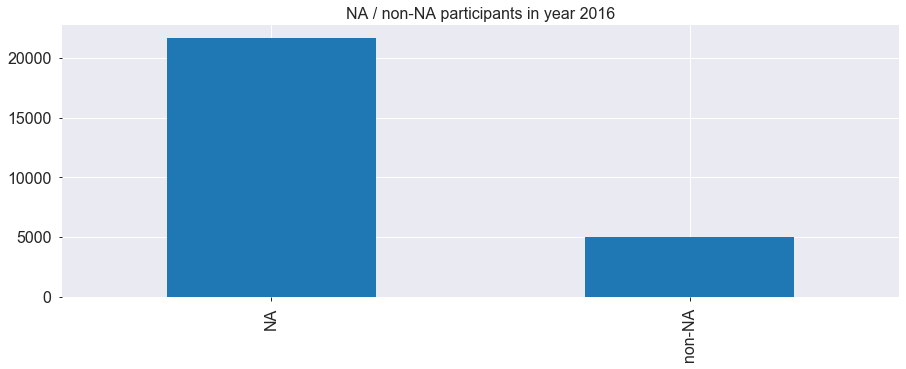

Year 2017: 


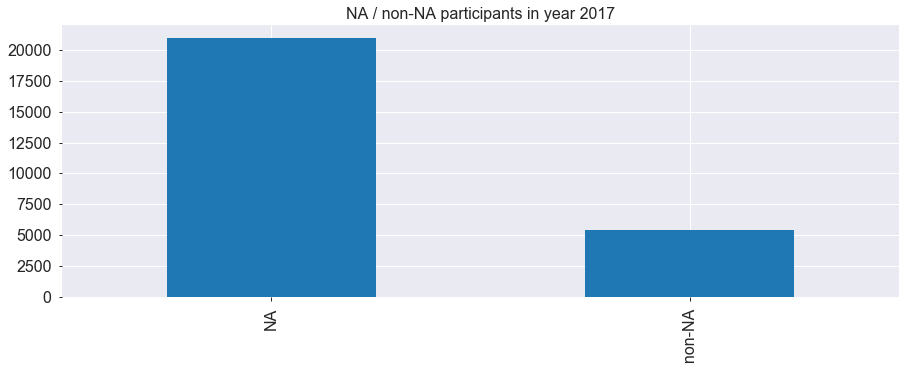

In [22]:
# distribution on US / non-US paticipants
dataframe['NA'] = np.where(dataframe.Country.isin(['USA', 'Canada', 'Mexico']), 'NA', 'non-NA')
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    ax = dataframe[dataframe.Year == year]['NA'].value_counts().plot(kind='bar', figsize=(15,5), fontsize=16)
    ax.set_title('NA / non-NA participants in year {0:d}'.format(year), fontsize=16)
    plt.show()

Year 2015: 


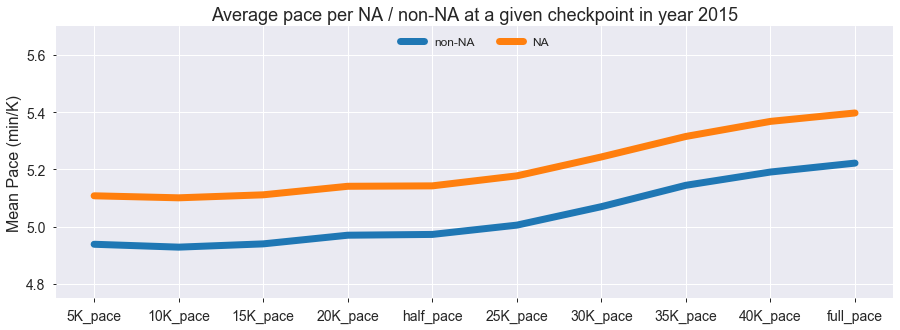

Year 2016: 


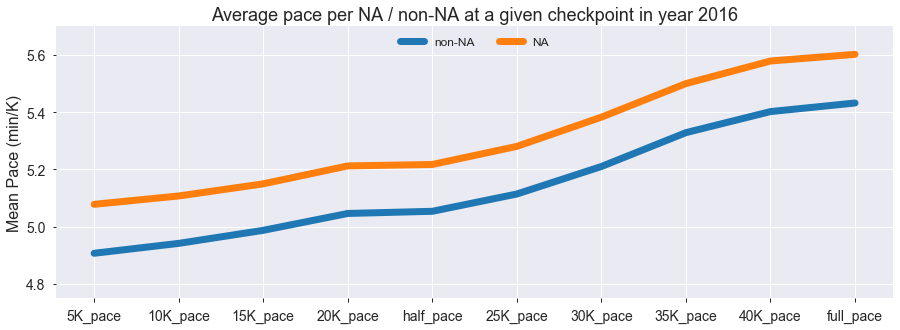

Year 2017: 


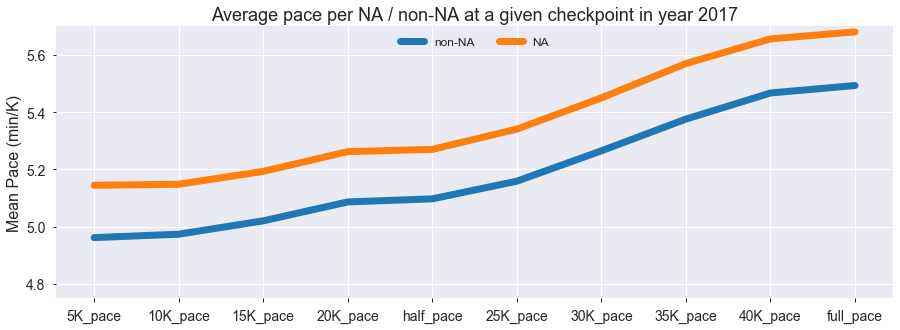

In [23]:
Paces = ['5K_pace', '10K_pace', '15K_pace', '20K_pace', 'half_pace', '25K_pace', '30K_pace', '35K_pace', '40K_pace', 'full_pace']
for year in dataframe.Year.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    print('Year {0:d}: '.format(year))
    for region in dataframe.NA.unique():
        pace_means = []
        for pace in Paces:
            pace_means.append(dataframe[(dataframe.Year == year) & (dataframe.NA == region)][pace].mean())  
        ax.plot(Paces, pace_means, linewidth=7.0, label = region)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    ax.set_ylabel("Mean Pace (min/K)", fontsize=16)
    ax.set_title("Average pace per NA / non-NA at a given checkpoint in year {0:d}".format(year), fontsize=18)
    ax.legend(loc=9, ncol=10, prop={'size': 12})
    ax.set_ylim(4.75, 5.7)
    plt.show()